<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Инструкция-по-выполнению-проекта" data-toc-modified-id="Инструкция-по-выполнению-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Инструкция по выполнению проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Инструкция по выполнению проекта

Загрузите и изучите данные.

Ответьте на вопрос и обоснуйте решение.

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- a. Изменится. Приведите примеры матриц.
- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
Предложите алгоритм преобразования данных для решения задачи. 

Обоснуйте, почему качество линейной регрессии не поменяется.

Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

## Загрузка данных

Описание данных.

Набор данных находится в файле /datasets/insurance.csv. 
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
local = False
if local:
    df = pd.read_csv('./datasets/insurance.csv')
else:
    url = "https://drive.google.com/file/d/1vTi31dg31zJ1FHNvGrOU6pbRXtaT_JWg/view?usp=sharing"
    path = 'https://drive.google.com/uc?export=download&id='+ url.split('/')[-2]
    df = pd.read_csv(path)    

In [3]:
df.head(5) #sample(10,random_state = 42)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


**Вывод: Пропусков - нет. Аномалий - нет.**

## Алгоритм преобразования

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:
$$
a = Xw
$$
Задача обучения:
$$
w = \arg\min_w MSE(Xw, y)
$$
Формула обучения:
$$
w = (X^T X)^{-1} X^T y
$$

**Алгоритм**

Умножим матрицу наших признаков на произвольную обратимую матрицу. Это позволит исказить визуально данные, но при этом мы имеем возможность восстановления исходных данных.
$
𝑋' = X P
$

**Обоснование непротиворечивости алгоритма**


Для доказательства понадобиться следующее утверждение из курса линейной алгебры:

Транспонированное произведение матриц  равно произведению двух транспонированных матриц, перемноженных в обратной последовательности: 
$
(AB)^T = B^T A^T
$

Произведение обратных матриц подчиняется тому же свойству перестановки сомножителей, что и произведение транспонированных матриц, а именно
$
(AB)^{-1} = B^{-1} A^{-1}
$


Распишем новую формулу обучения:

$
w' = ((X𝑃)^T X𝑃)^{-1} (X𝑃)^T y = (X𝑃)^{-1} ((X𝑃)^T)^{-1} 𝑃^T X^T y = (𝑃)^{-1} (X)^{-1} (𝑃^T X^T)^{-1} 𝑃^T X^T y = (𝑃)^{-1} (X)^{-1} (X^T)^{-1} (𝑃^T)^{-1} 𝑃^T X^T y
$

так, как:
$
(𝑃^T)^{-1} 𝑃^T = E
$

то можно сократить и тогда получим:

$
w' = (𝑃)^{-1} (X^T X)^{-1} X^T y
$

в результате параметры модели будут преобразовываться по формуле

$
𝑤′ = (𝑃)^{-1} w
$


Посмотрим чему, же будут равны новые предсказания:

$$
a′ = X'w' = X P (𝑃)^{-1} w = X w = a
$$

то есть предсказания не изменятся!

**Вывод: Мы доказали, что при преобразовании признаков путем умножения признаков на обратимую матрицу предсказания не изменятся.**

## Проверка алгоритма

In [6]:
y = df['Страховые выплаты'].copy()
X = df.drop('Страховые выплаты', axis=1).copy()

In [7]:
# проверка на мультиколлинеарность
X.corr()

,Пол,Возраст,Зарплата,Члены семьи
Пол,1.000000,0.002074,0.014910,-0.008991
Возраст,0.002074,1.000000,-0.019093,-0.006692
Зарплата,0.014910,-0.019093,1.000000,-0.030296
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000


Мультиколлинеарных признаков - нет.

**В качестве метрики используется коэффициент детерминированости - R2, определение из scikit-learn.org**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression.get_params

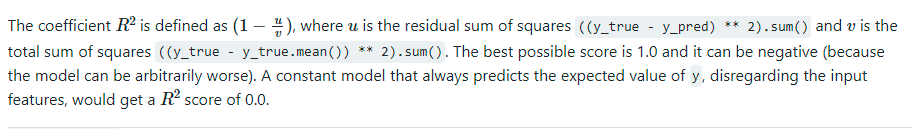

In [8]:
def ModelLinearRegression(X,y):
    # отделим 25% данных для валидационной + обучающейq выборки
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    score = r2_score(y_valid, predicted_valid)
    return score, model.coef_

In [9]:
R2, coef = ModelLinearRegression(X, y)
print('Метрика R2 до преобразования признаков = ',R2)

Метрика R2 до преобразования признаков =  0.42547785406963123


In [10]:
coef

array([ 4.92432086e-03,  3.51527196e-02, -2.45796619e-07, -1.49140089e-02])

Посмотрим R2 для константной модели. Где все предсказания равны среднему значению целевого признака.

In [11]:
y_const = [y.mean()]*len(y)

In [12]:
print('Метрика R2 константной модели = ',r2_score(y, y_const))

Метрика R2 константной модели =  0.0


Матрицу для преобразования получим из случайного гауссового распределения

In [13]:
np.random.seed(42)
P = np.rint(np.random.normal(0, 1, size=(4, 4)) * 100)
P

array([[  50.,  -14.,   65.,  152.],
       [ -23.,  -23.,  158.,   77.],
       [ -47.,   54.,  -46.,  -47.],
       [  24., -191., -172.,  -56.]])

Проверим матрицу на обратимось.

In [14]:
try:
    inv_P = np.linalg.inv(P)
except:
    print('Матрица необратима!')
inv_P

array([[-0.0034517 , -0.01033671, -0.02235242, -0.00482179],
       [ 0.00131299, -0.00479504,  0.00153748, -0.00431975],
       [-0.00521705,  0.00339131, -0.0084416 , -0.00241261],
       [ 0.01006628,  0.00150835,  0.01110427,  0.00221995]])

In [15]:
# проверим результат, должна получится единичная матрица при умножении P и inv_P
E = np.rint(P @ inv_P)
E

array([[ 1.,  0., -0., -0.],
       [-0.,  1.,  0.,  0.],
       [ 0., -0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

Проведем преобразование признаков и посмотрим на результат

In [16]:
transformed_features = pd.DataFrame(X.values @ P )
transformed_features

,0,1,2,3
0,-2332069.0,2677252.0,-2275229.0,-2327947.0
1,-1787034.0,2050751.0,-1740904.0,-1782514.0
2,-987667.0,1133333.0,-961418.0,-984767.0
3,-1960335.0,2250935.0,-1915226.0,-1958395.0
4,-1227294.0,1408742.0,-1196111.0,-1224392.0
...,...,...,...,...
4995,-1678496.0,1926774.0,-1638120.0,-1675856.0
4996,-2463558.0,2828627.0,-2405200.0,-2460238.0
4997,-1593712.0,1829758.0,-1556584.0,-1591872.0
4998,-1537284.0,1764707.0,-1501175.0,-1535222.0


**Вывод: Персональная информации скрыта. Не зная, матрицы преобразования признаков, восстановить исходную информацию будет сложно.**

Смотрим метрику после трансформации признаков

In [17]:
R2_transformed_features, coeff_transformed_features = ModelLinearRegression(transformed_features, y)
print('Метрика R2 после преобразования признаков = ', R2_transformed_features)

Метрика R2 после преобразования признаков =  0.42547785406963246


In [18]:
coeff_transformed_features

array([-3.08442796e-04, -9.76689027e-05,  1.29506942e-04,  6.94812158e-05])

**Вывод: Метрика R2 для преобразованных признаков практически совпадает с исходной метрикой до трансформации признаков.**

Ранее было показано, что параметры исходной и трансформированной модели связаны соотнощением:

$
𝑤′ = (𝑃)^{-1} w
$

Проверим теорию на практике:

In [19]:
# умножаем обратную матрицу на параметры линейной регрессии до трансформации
inv_P @ coef

array([-3.08442796e-04, -9.76689027e-05,  1.29506942e-04,  6.94812158e-05])

In [20]:
# параметры линейной регрессии после трансформации
coeff_transformed_features

array([-3.08442796e-04, -9.76689027e-05,  1.29506942e-04,  6.94812158e-05])

**Вывод: Расчет параметров линейной модели по теоретической формуле подтвержден практикой!**

Сгенерируем 1000 матриц преобразования и посмотрим на разность между метриками R2 до трансформации признаков и после трансформации признаков

In [21]:
def transformed_features_r2(X,y):
    P = np.rint(np.random.normal(0, 1, size=(4, 4)) * 100)
    try:
        inv_P = np.linalg.inv(P)
    except:
        print('Матрица необратима!')
        return 0
    transformed_features = pd.DataFrame(X.values @ P)
    transformed_R2, _ = ModelLinearRegression(transformed_features, y)
    return (transformed_R2 - R2)


In [22]:
np.random.seed(42)
count = 1000
list_r2=[] 
for i in range(count):
    r2 = transformed_features_r2(X,y)
    list_r2.append(r2)

In [23]:
pd.Series(list_r2).describe() 

count    1.000000e+03
mean    -5.607181e-15
std      2.005838e-13
min     -2.804756e-12
25%     -1.865175e-14
50%     -4.996004e-16
75%      1.290634e-14
max      3.985479e-12
dtype: float64

**Вывод: Мы получили устойчивый алгоритм преобразования признаков. Разность метрик R2 до трансформации признаков и после трансформации в среднем равна $10^{-15}$.**

# Выводы

Разработан алгоритм преобразования данных, по которому сложно восстановить персональную информацию.

Алгоритм заключается в умножении признаков на обратимую матрицу. Доказано математически, что при таком преобразовании признаков точность предсказания не изменится. А параметры линейной регрессии связаны формулой:

$
𝑤′ = (𝑃)^{-1} w
$
, где
- $P$ — матрица, на которую умножаются признаки
- $w$ — вектор весов линейной регрессии до трансформации
- $w'$ — вектор весов линейной регрессии после трансформации


В качестве генерации матриц для преобразования признаков предложено выбрать функцию **np.random.normal** из пакета **numpy**.

Для проверки соответствия теории и практики, было сгенерировано 1000 случаев преобразования признаков раздичными матрицами. Разность метрик R2 до трансформации признаков и после трансформации в среднем равна  $10^{-15}$.

Таким образом, мы получили устойчивый алгоритм преобразования признаков для скрытия персональных данных.